# Project Name: Rain Prediction using ML models and PyCaret

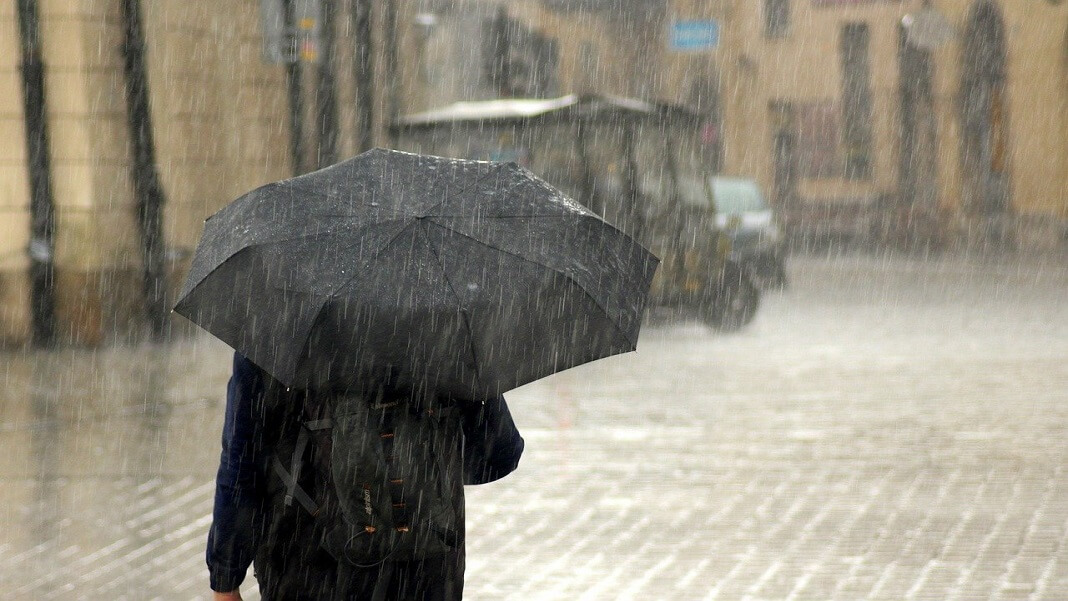

### In this project we will create a web app which will predict wether it will rain tomorrow or not.


### We will be using different ML models and then Auto ML Library i.e. PyCaret in this project

### Time Line of the Project :
- Data Analysis
- Handling Missing Values
- Handling Categorical Varibales
- Feature Engineering
- Model Building using ML 
- Model Building using Auto ML i.e PyCaret

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
%matplotlib inline

### Reading our data

In [2]:
df=  pd.read_csv("Australia weather.csv")
pd.set_option("display.max_columns", None)

In [3]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


### Let us devide our variables into different categories

In [4]:
df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

#### Discrete Variable are countable in finit amount of time while numerical variable are to much in number to count

In [5]:
num_var = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_var = [feature for feature in num_var if len(df[feature].unique()) <= 25]
cont_var = [feature for feature in num_var if feature not in discrete_var]
categ_var = [feature for feature in df.columns if feature not in num_var]

In [6]:
df[categ_var]

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,E,SE,ENE,No,No
145456,2017-06-22,Uluru,NNW,SE,N,No,No
145457,2017-06-23,Uluru,N,SE,WNW,No,No
145458,2017-06-24,Uluru,SE,SSE,N,No,No


### Handling Missing Values

In [7]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [8]:
df.isnull().sum()*100/len(df)

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [9]:
def find_var_type(var):
    

    if var in discrete_var:
        print("{} is a Numerical Variable, Discrete in nature".format(var))
    elif var in cont_var :
        print("{} is a Numerical Variable, Continuous in nature".format(var))
    else :
        print("{} is a Categorical Variable".format(var))

In [10]:
find_var_type('Cloud3pm')

Cloud3pm is a Numerical Variable, Discrete in nature


### We will do Ramdom Sample Imputation for the our variables which are having the most percentage of Nul Vlaues

In [11]:
def RandomSampleImputation(df, feature):
    df[feature]=df[feature]
    random_sample=df[feature].dropna().sample(df[feature].isnull().sum(),random_state=0)
    random_sample.index=df[df[feature].isnull()].index
    df.loc[df[feature].isnull(),feature]=random_sample

In [13]:
RandomSampleImputation(df, "Cloud9am")
RandomSampleImputation(df, "Cloud3pm")
RandomSampleImputation(df, "Evaporation")
RandomSampleImputation(df, "Sunshine")

In [14]:
df.isnull().sum()*100/len(df)

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation       0.000000
Sunshine          0.000000
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am          0.000000
Cloud3pm          0.000000
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [15]:
find_var_type('RainToday')

RainToday is a Categorical Variable


### Then we will replace the null values of all the continuous feature which are having less number of null values

In [16]:
def MeanImputation(df, feature):
    df[feature]= df[feature]
    mean= df[feature].mean()
    df[feature]= df[feature].fillna(mean)

In [17]:
MeanImputation(df,'Pressure3pm')

In [18]:
MeanImputation(df, 'Pressure9am')
MeanImputation(df, 'MinTemp')
MeanImputation(df, 'MaxTemp')
MeanImputation(df, 'Rainfall')
MeanImputation(df, 'WindGustSpeed')
MeanImputation(df, 'WindSpeed9am')
MeanImputation(df, 'WindSpeed3pm')
MeanImputation(df, 'Pressure9am')
MeanImputation(df, 'Humidity9am')
MeanImputation(df, 'Humidity3pm')
MeanImputation(df, 'Temp3pm')
MeanImputation(df, 'Temp9am')

In [19]:
df.isnull().sum()*100/len(df)

Date             0.000000
Location         0.000000
MinTemp          0.000000
MaxTemp          0.000000
Rainfall         0.000000
Evaporation      0.000000
Sunshine         0.000000
WindGustDir      7.098859
WindGustSpeed    0.000000
WindDir9am       7.263853
WindDir3pm       2.906641
WindSpeed9am     0.000000
WindSpeed3pm     0.000000
Humidity9am      0.000000
Humidity3pm      0.000000
Pressure9am      0.000000
Pressure3pm      0.000000
Cloud9am         0.000000
Cloud3pm         0.000000
Temp9am          0.000000
Temp3pm          0.000000
RainToday        2.241853
RainTomorrow     2.245978
dtype: float64

### Now we are left with the categotical varibales only, for these variables we will replace null values later in the Label Encoding part.

### Plotting a HeatMap

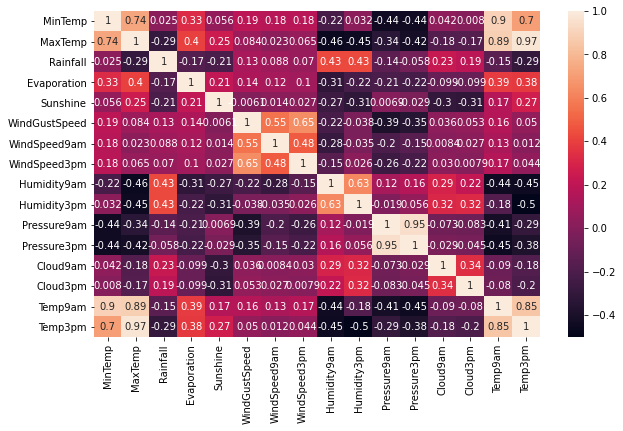

In [20]:
corrmat = df.corr(method = "spearman")
plt.figure(figsize=(10,6))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

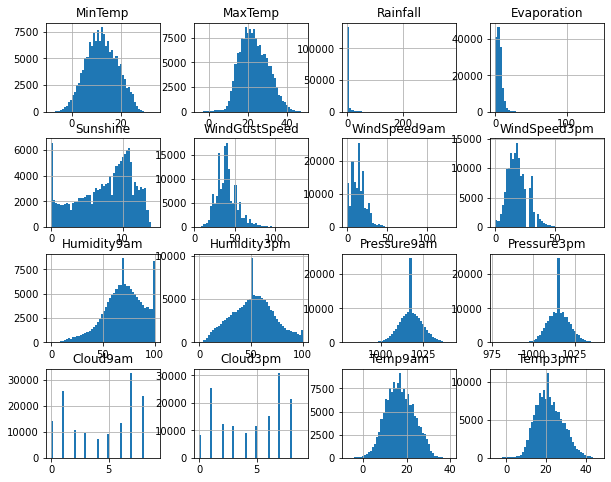

In [21]:
_ = df.hist(bins=50, figsize=(10,8))


### Analysis for Continuous variables

C:\Users\PRATYAY\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


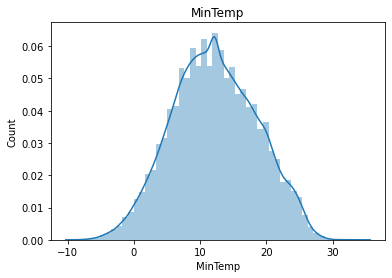

<Figure size 1080x1080 with 0 Axes>

C:\Users\PRATYAY\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


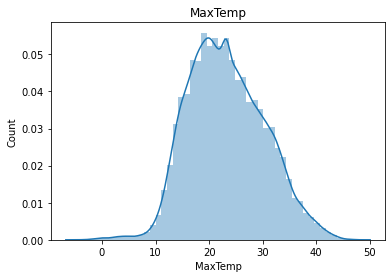

<Figure size 1080x1080 with 0 Axes>

C:\Users\PRATYAY\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


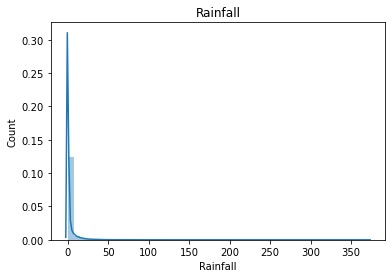

<Figure size 1080x1080 with 0 Axes>

C:\Users\PRATYAY\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


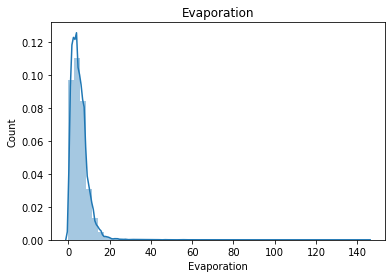

<Figure size 1080x1080 with 0 Axes>

C:\Users\PRATYAY\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


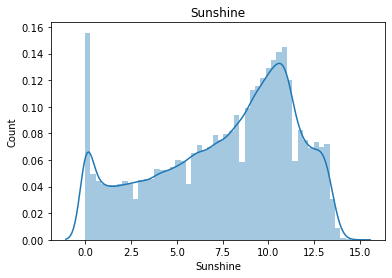

<Figure size 1080x1080 with 0 Axes>

C:\Users\PRATYAY\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


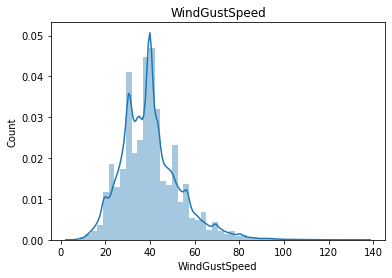

<Figure size 1080x1080 with 0 Axes>

C:\Users\PRATYAY\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


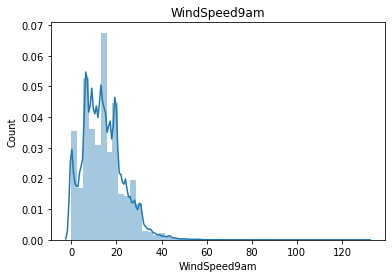

<Figure size 1080x1080 with 0 Axes>

C:\Users\PRATYAY\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


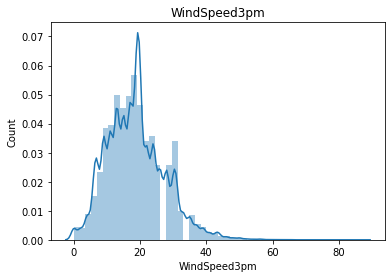

<Figure size 1080x1080 with 0 Axes>

C:\Users\PRATYAY\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


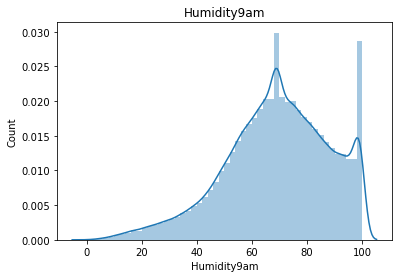

<Figure size 1080x1080 with 0 Axes>

C:\Users\PRATYAY\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


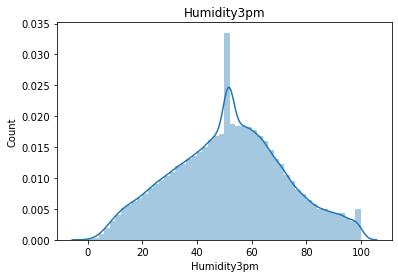

<Figure size 1080x1080 with 0 Axes>

C:\Users\PRATYAY\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


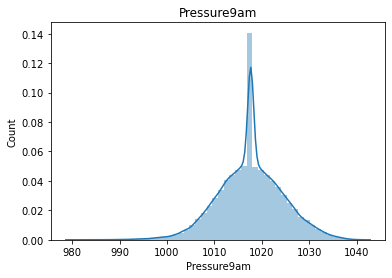

<Figure size 1080x1080 with 0 Axes>

C:\Users\PRATYAY\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


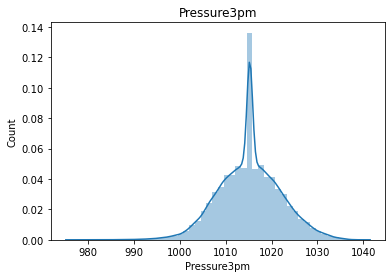

<Figure size 1080x1080 with 0 Axes>

C:\Users\PRATYAY\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


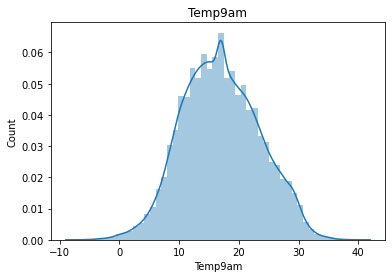

<Figure size 1080x1080 with 0 Axes>

C:\Users\PRATYAY\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


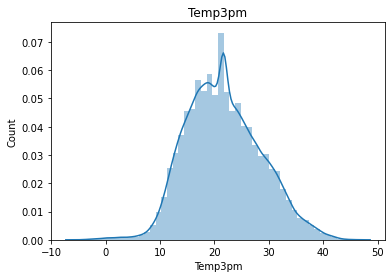

<Figure size 1080x1080 with 0 Axes>

In [22]:
for feature in cont_var:
    data=df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

C:\Users\PRATYAY\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\PRATYAY\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\PRATYAY\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\PRATYAY\Anaconda

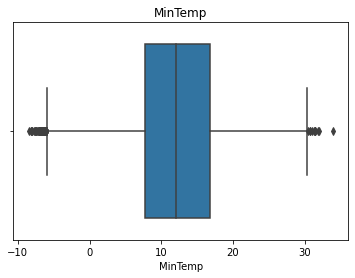

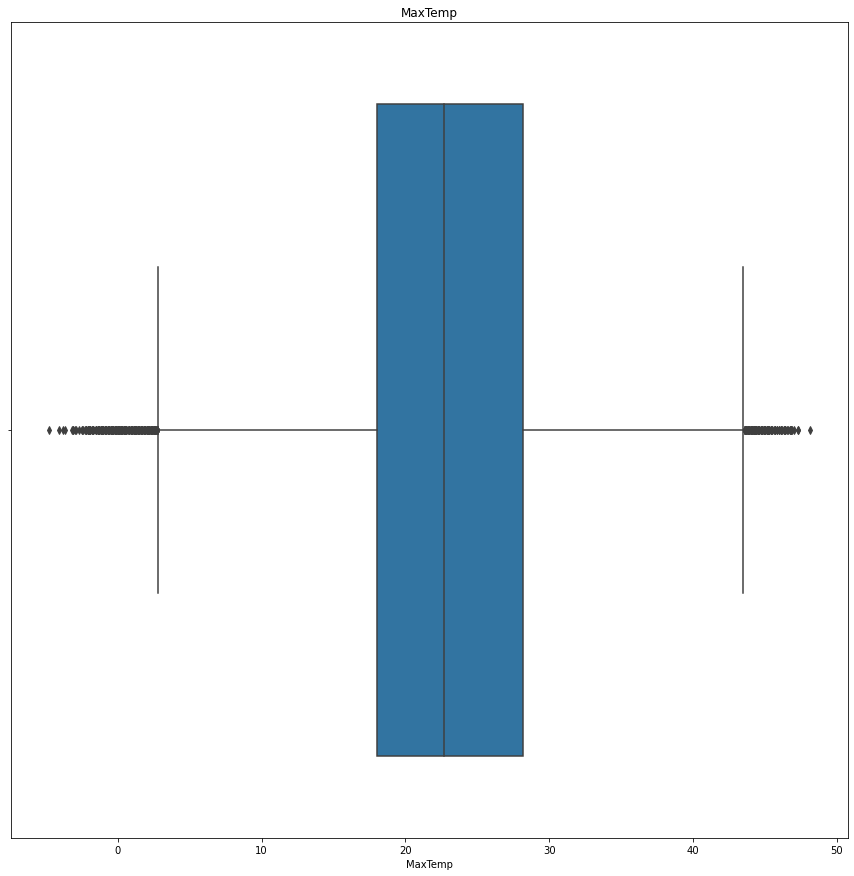

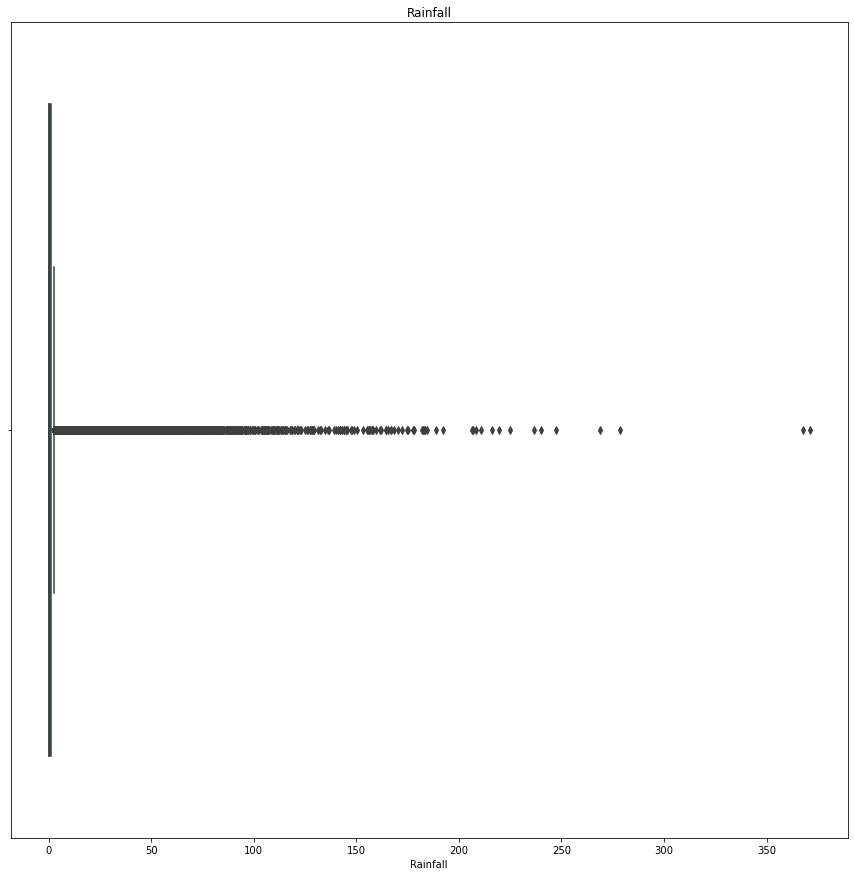

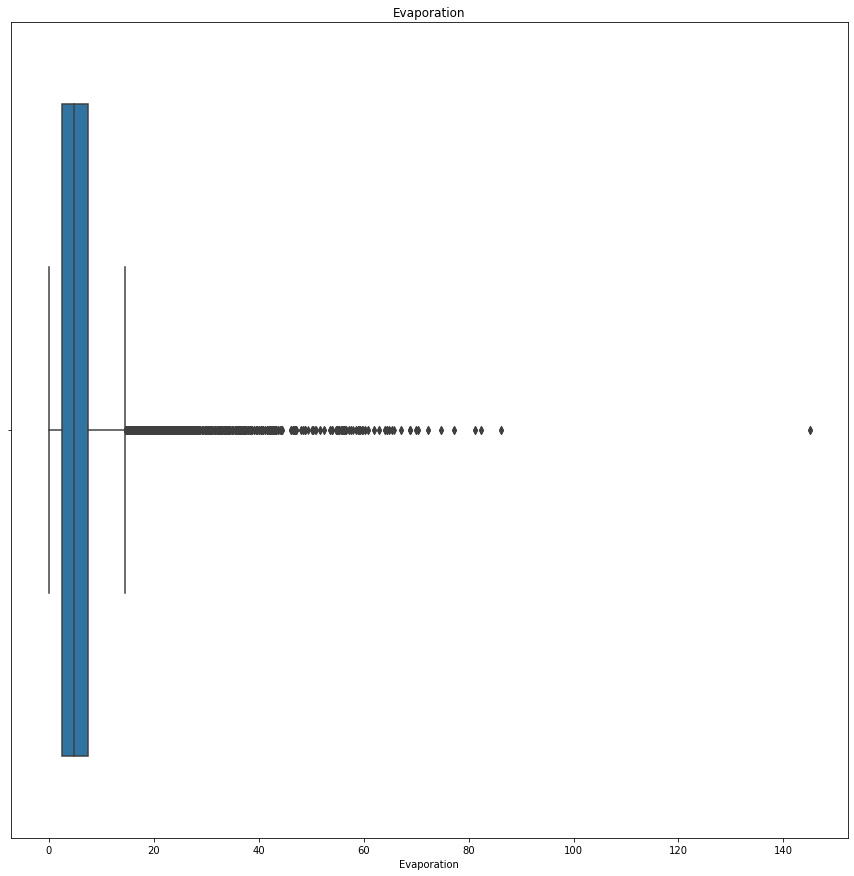

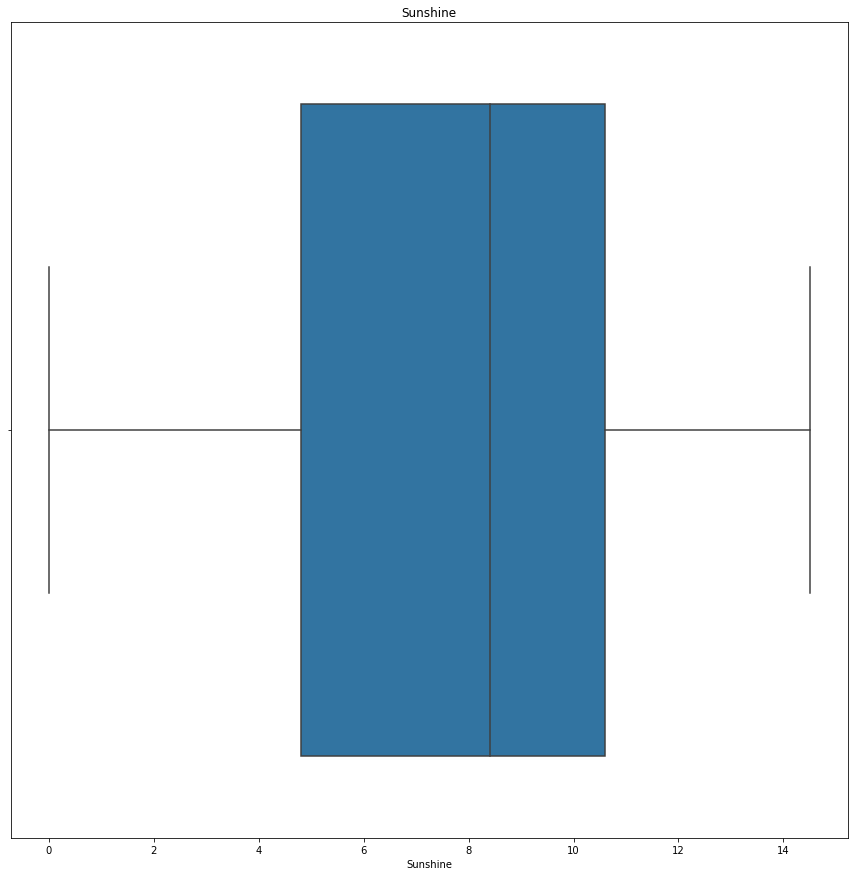

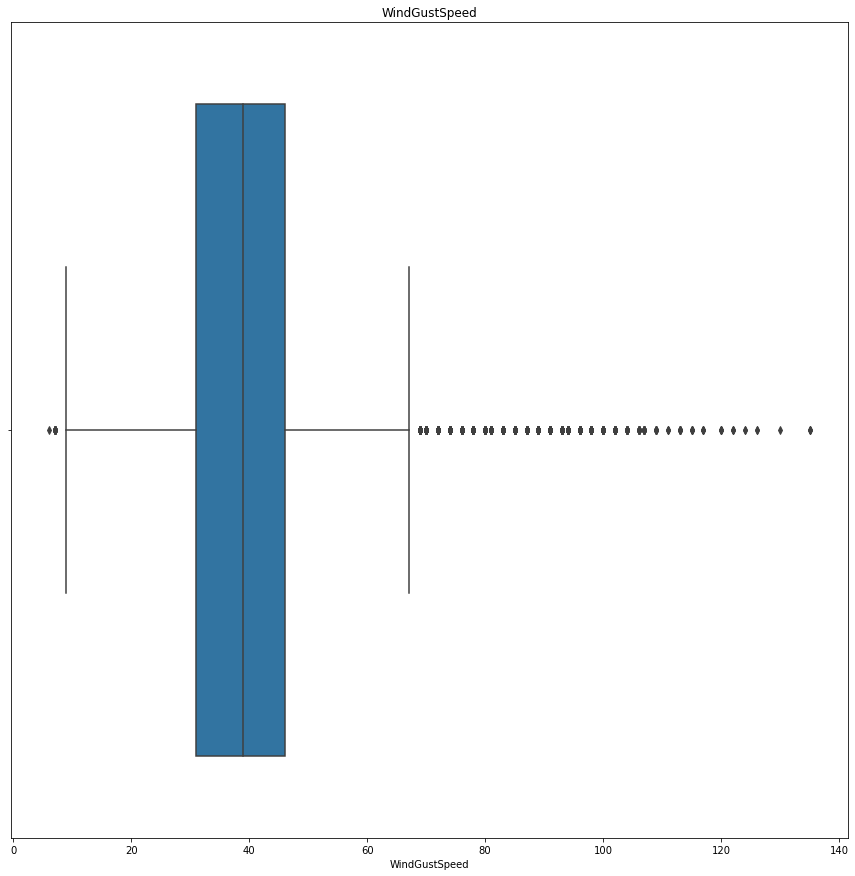

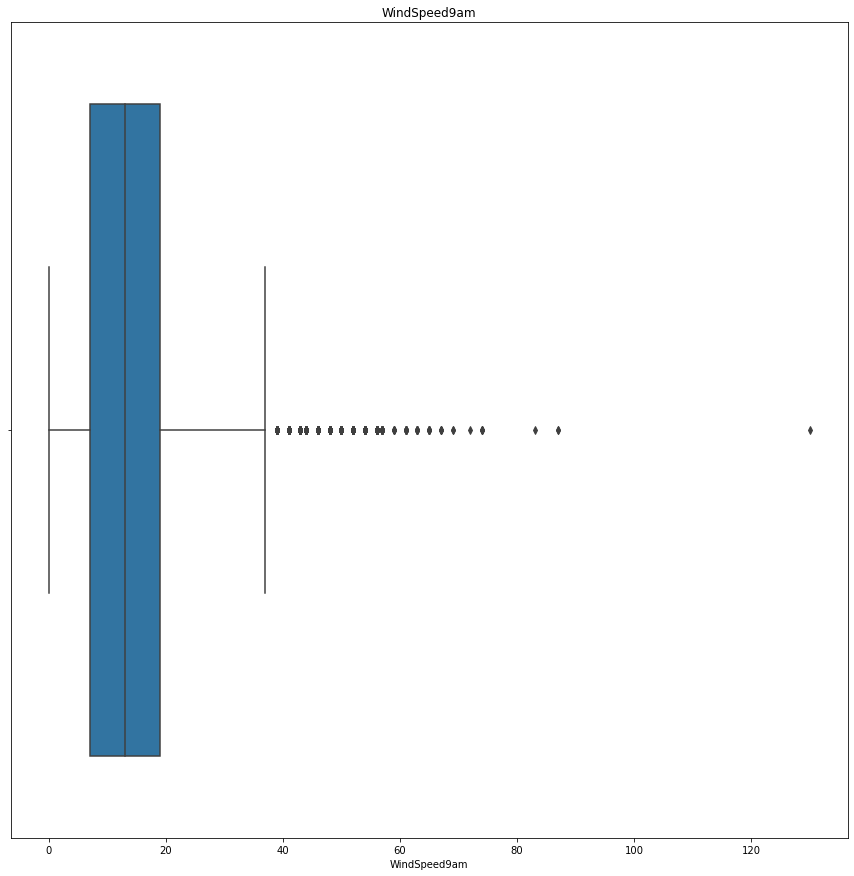

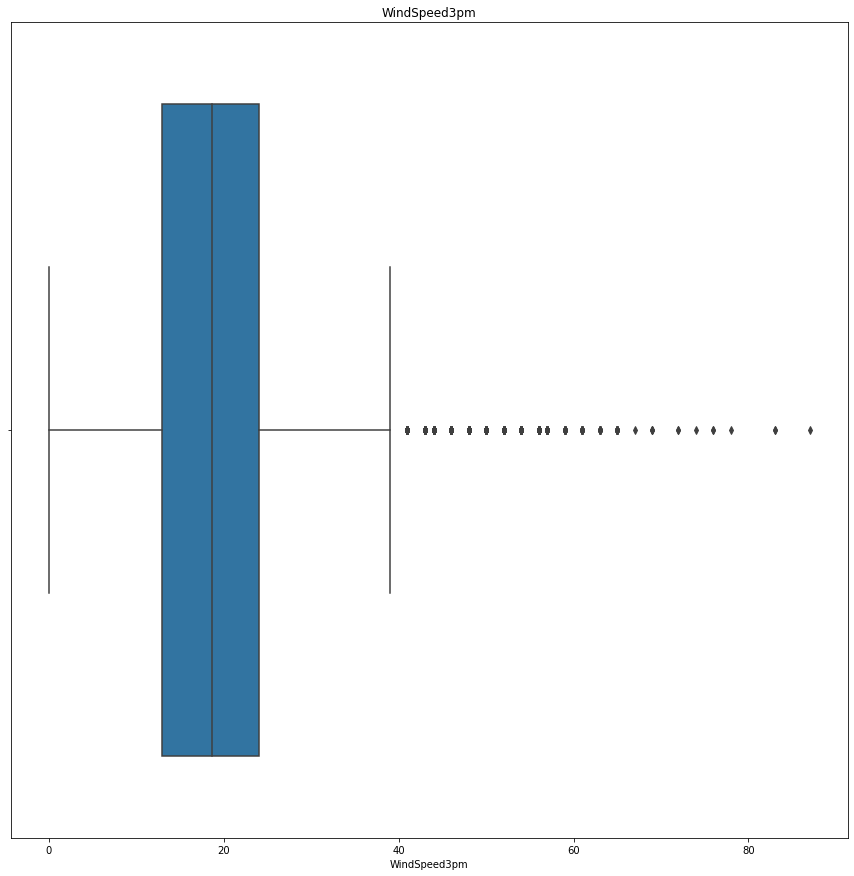

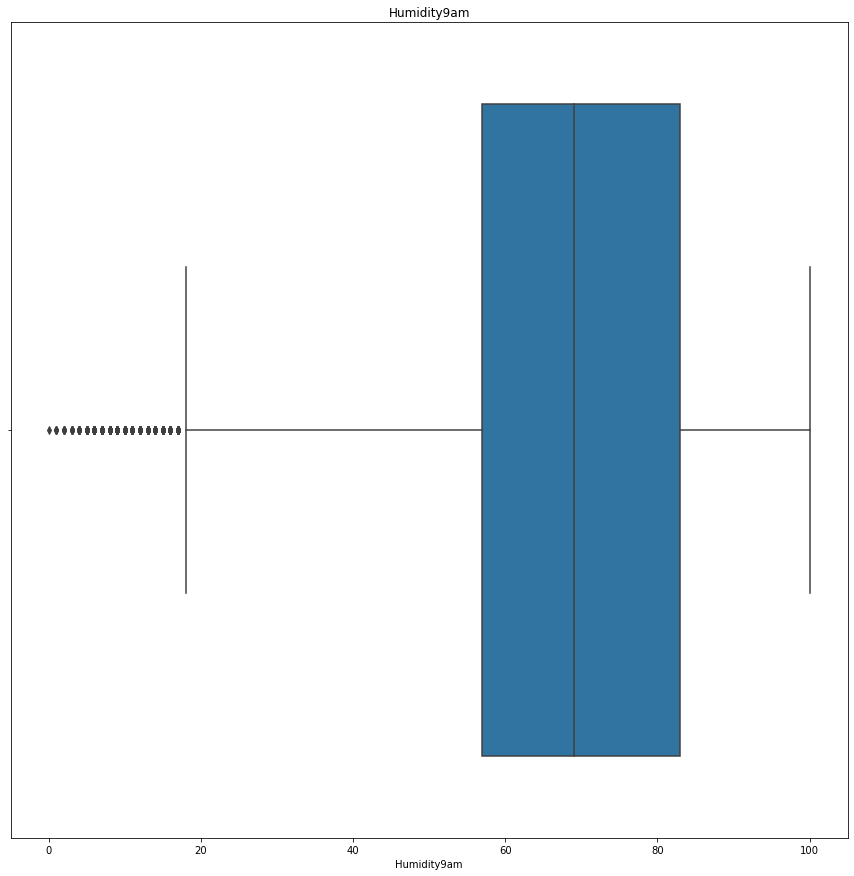

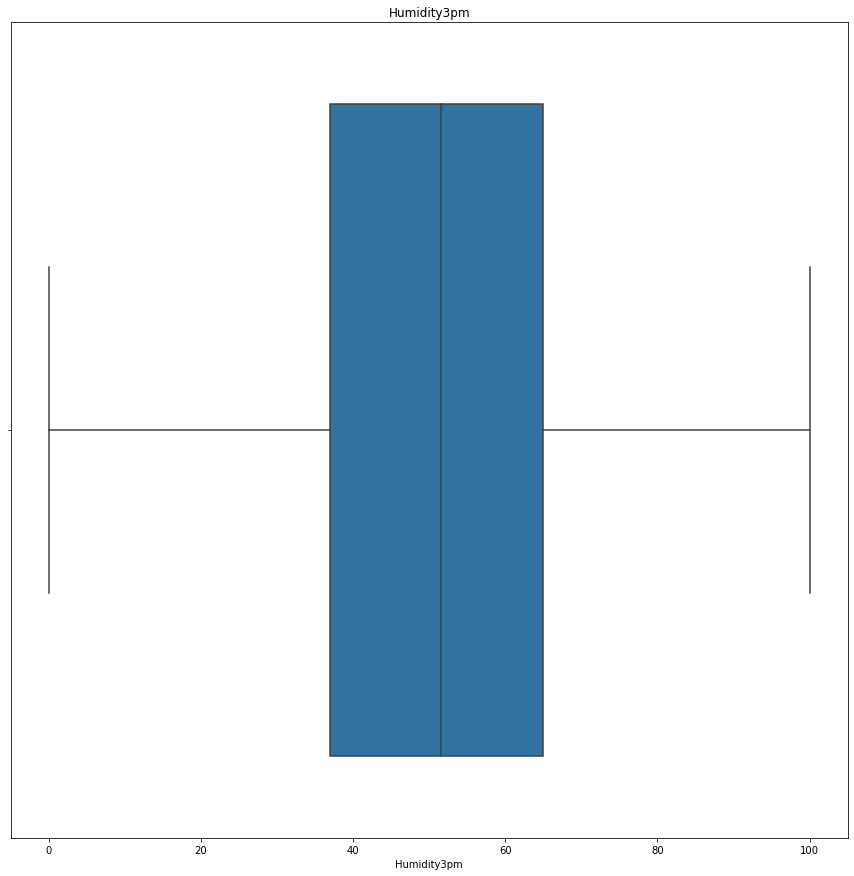

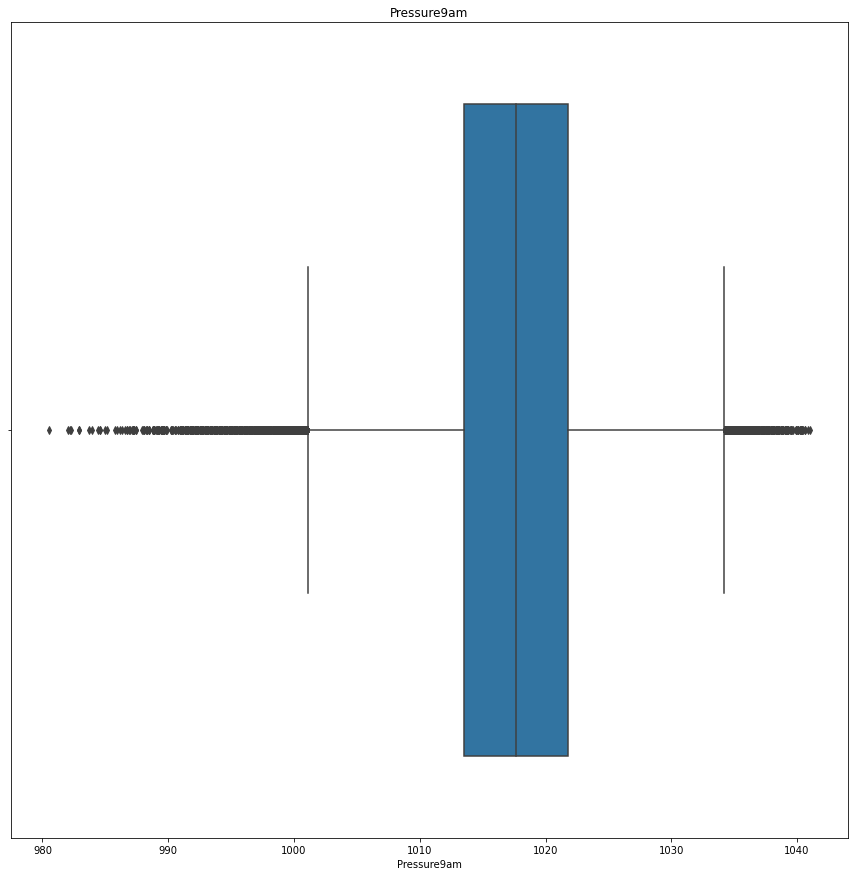

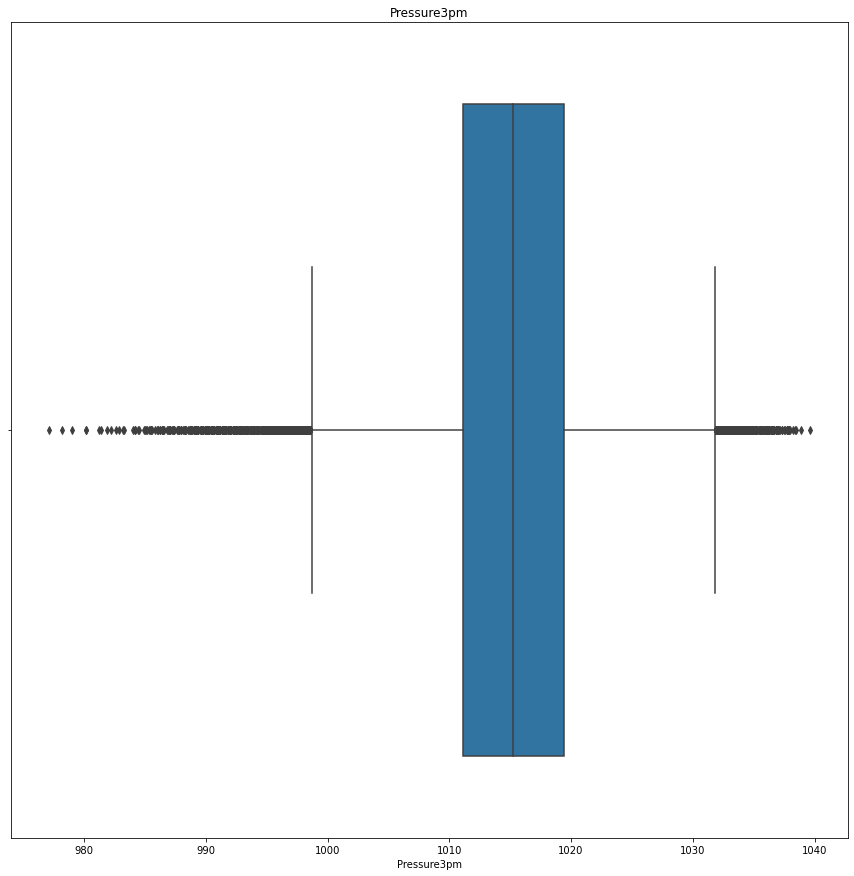

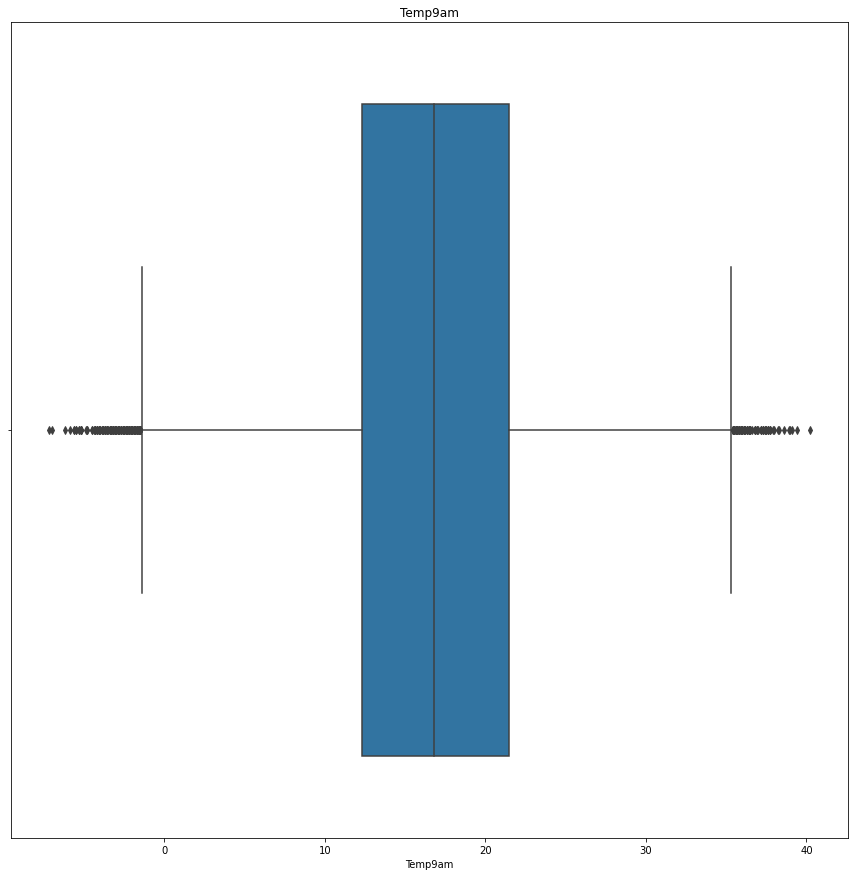

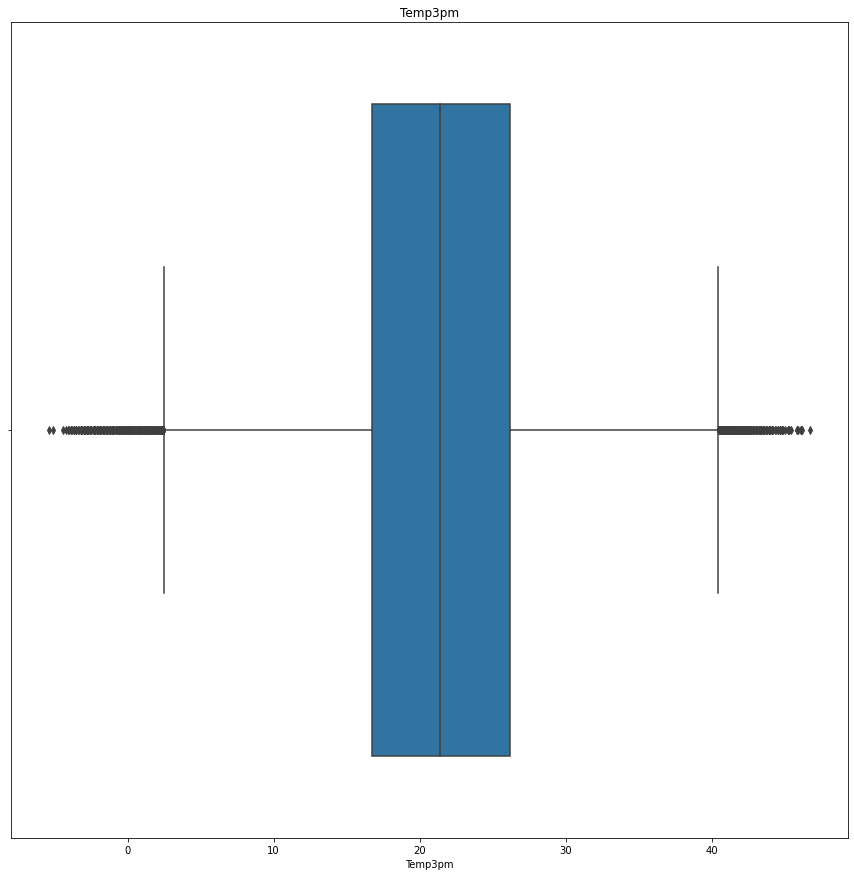

<Figure size 1080x1080 with 0 Axes>

In [24]:
for feature in cont_var:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

### One Hot Encoding

In [26]:
df["RainToday"] = pd.get_dummies(df["RainToday"], drop_first = True)
df["RainTomorrow"] = pd.get_dummies(df["RainTomorrow"], drop_first = True)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.900000,0.6,2.4,8.3,W,44.00000,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.100000,0.0,3.6,10.0,WNW,44.00000,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.700000,0.0,2.6,4.4,WSW,46.00000,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.000000,0.0,18.4,8.9,NE,24.00000,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.300000,1.0,5.4,3.0,W,41.00000,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.400000,0.0,1.4,7.8,E,31.00000,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,1.0,1.0,10.1,22.4,0,0
145456,2017-06-22,Uluru,3.6,25.300000,0.0,7.6,13.5,NNW,22.00000,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,8.0,5.0,10.9,24.5,0,0
145457,2017-06-23,Uluru,5.4,26.900000,0.0,6.8,11.0,N,37.00000,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,8.0,1.0,12.5,26.1,0,0
145458,2017-06-24,Uluru,7.8,27.000000,0.0,2.6,13.2,SE,28.00000,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


### Lable Encoding

In [27]:
for feature in categ_var:
    print(feature, (df.groupby([feature])["RainTomorrow"].mean().sort_values(ascending = False)).index)

Date Index(['2007-11-01', '2007-12-15', '2008-02-03', '2008-01-31', '2008-01-30',
       '2008-01-19', '2008-01-18', '2008-01-16', '2008-01-12', '2007-11-30',
       ...
       '2008-05-08', '2008-05-09', '2008-01-03', '2008-01-02', '2008-05-10',
       '2008-05-11', '2008-05-12', '2008-05-13', '2008-05-14', '2007-12-25'],
      dtype='object', name='Date', length=3436)
Location Index(['Portland', 'Walpole', 'Cairns', 'Dartmoor', 'NorfolkIsland',
       'MountGambier', 'Albany', 'Witchcliffe', 'CoffsHarbour', 'MountGinini',
       'NorahHead', 'Darwin', 'Sydney', 'SydneyAirport', 'Ballarat',
       'GoldCoast', 'Watsonia', 'Newcastle', 'Hobart', 'Wollongong',
       'Williamtown', 'Launceston', 'Brisbane', 'MelbourneAirport', 'Adelaide',
       'Sale', 'Albury', 'Perth', 'Melbourne', 'Nuriootpa', 'Penrith',
       'BadgerysCreek', 'PerthAirport', 'Tuggeranong', 'Richmond', 'Bendigo',
       'Canberra', 'WaggaWagga', 'Townsville', 'Katherine', 'PearceRAAF',
       'SalmonGums', 'Nhil', 

In [28]:
windgustdir = {'NNW':0, 'NW':1, 'WNW':2, 'N':3, 'W':4, 'WSW':5, 'NNE':6, 'S':7, 'SSW':8, 'SW':9, 'SSE':10,
       'NE':11, 'SE':12, 'ESE':13, 'ENE':14, 'E':15}
winddir9am = {'NNW':0, 'N':1, 'NW':2, 'NNE':3, 'WNW':4, 'W':5, 'WSW':6, 'SW':7, 'SSW':8, 'NE':9, 'S':10,
       'SSE':11, 'ENE':12, 'SE':13, 'ESE':14, 'E':15}
winddir3pm = {'NW':0, 'NNW':1, 'N':2, 'WNW':3, 'W':4, 'NNE':5, 'WSW':6, 'SSW':7, 'S':8, 'SW':9, 'SE':10,
       'NE':11, 'SSE':12, 'ENE':13, 'E':14, 'ESE':15}
df["WindGustDir"] = df["WindGustDir"].map(windgustdir)
df["WindDir9am"] = df["WindDir9am"].map(winddir9am)
df["WindDir3pm"] = df["WindDir3pm"].map(winddir3pm)

In [29]:
df["WindGustDir"] = df["WindGustDir"].fillna(df["WindGustDir"].value_counts().index[0])
df["WindDir9am"] = df["WindDir9am"].fillna(df["WindDir9am"].value_counts().index[0])
df["WindDir3pm"] = df["WindDir3pm"].fillna(df["WindDir3pm"].value_counts().index[0])

In [30]:
df.isnull().sum()*100/len(df)

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

In [31]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,2.4,8.3,4.0,44.0,5.0,3.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,3.6,10.0,2.0,44.0,0.0,6.0,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,2.6,4.4,5.0,46.0,5.0,6.0,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,18.4,8.9,11.0,24.0,13.0,14.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,5.4,3.0,4.0,41.0,12.0,0.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


### We have removed all the null values and handeled with categorical data

### Now we will do the Label Encoding for our Location according to our Target variable

In [32]:
df_loc = df.groupby(["Location"])["RainTomorrow"].value_counts().sort_values().unstack()

In [33]:
df_loc.head()

RainTomorrow,0,1
Location,,
Adelaide,2505,688
Albany,2138,902
Albury,2422,618
AliceSprings,2796,244
BadgerysCreek,2426,583


In [34]:
df_loc[1].sort_values(ascending = False)

Location
Portland            1095
Cairns               950
Walpole              949
Dartmoor             922
MountGambier         920
NorfolkIsland        919
Albany               902
Witchcliffe          879
CoffsHarbour         869
Sydney               865
Darwin               852
MountGinini          819
NorahHead            808
Ballarat             781
GoldCoast            775
SydneyAirport        774
Hobart               761
Watsonia             738
Newcastle            731
Wollongong           713
Brisbane             709
Williamtown          700
Launceston           699
Adelaide             688
MelbourneAirport     653
Perth                645
Sale                 643
Melbourne            636
Canberra             629
Albury               618
Penrith              595
Nuriootpa            592
BadgerysCreek        583
Tuggeranong          568
PerthAirport         567
Bendigo              562
Richmond             560
WaggaWagga           536
Townsville           519
PearceRAAF      

In [35]:
df_loc[1].sort_values(ascending = False).index

Index(['Portland', 'Cairns', 'Walpole', 'Dartmoor', 'MountGambier',
       'NorfolkIsland', 'Albany', 'Witchcliffe', 'CoffsHarbour', 'Sydney',
       'Darwin', 'MountGinini', 'NorahHead', 'Ballarat', 'GoldCoast',
       'SydneyAirport', 'Hobart', 'Watsonia', 'Newcastle', 'Wollongong',
       'Brisbane', 'Williamtown', 'Launceston', 'Adelaide', 'MelbourneAirport',
       'Perth', 'Sale', 'Melbourne', 'Canberra', 'Albury', 'Penrith',
       'Nuriootpa', 'BadgerysCreek', 'Tuggeranong', 'PerthAirport', 'Bendigo',
       'Richmond', 'WaggaWagga', 'Townsville', 'PearceRAAF', 'SalmonGums',
       'Moree', 'Cobar', 'Mildura', 'Katherine', 'AliceSprings', 'Nhil',
       'Woomera', 'Uluru'],
      dtype='object', name='Location')

In [36]:
len(df_loc[1].sort_values(ascending = False).index)

49

In [37]:
mapped_location = {'Portland':1, 'Cairns':2, 'Walpole':3, 'Dartmoor':4, 'MountGambier':5,
       'NorfolkIsland':6, 'Albany':7, 'Witchcliffe':8, 'CoffsHarbour':9, 'Sydney':10,
       'Darwin':11, 'MountGinini':12, 'NorahHead':13, 'Ballarat':14, 'GoldCoast':15,
       'SydneyAirport':16, 'Hobart':17, 'Watsonia':18, 'Newcastle':19, 'Wollongong':20,
       'Brisbane':21, 'Williamtown':22, 'Launceston':23, 'Adelaide':24, 'MelbourneAirport':25,
       'Perth':26, 'Sale':27, 'Melbourne':28, 'Canberra':29, 'Albury':30, 'Penrith':31,
       'Nuriootpa':32, 'BadgerysCreek':33, 'Tuggeranong':34, 'PerthAirport':35, 'Bendigo':36,
       'Richmond':37, 'WaggaWagga':38, 'Townsville':39, 'PearceRAAF':40, 'SalmonGums':41,
       'Moree':42, 'Cobar':43, 'Mildura':44, 'Katherine':45, 'AliceSprings':46, 'Nhil':47,
       'Woomera':48, 'Uluru':49}
df["Location"] = df["Location"].map(mapped_location)

### Mapping Data

In [39]:
df["Date"] = pd.to_datetime(df["Date"], format = "%Y-%m-%dT", errors = "coerce")
df["Date_month"] = df["Date"].dt.month
df["Date_day"] = df["Date"].dt.day

In [40]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month,Date_day
0,2008-12-01,30,13.4,22.9,0.6,2.4,8.3,4.0,44.0,5.0,3.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0,12,1
1,2008-12-02,30,7.4,25.1,0.0,3.6,10.0,2.0,44.0,0.0,6.0,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,0,0,12,2
2,2008-12-03,30,12.9,25.7,0.0,2.6,4.4,5.0,46.0,5.0,6.0,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,0,0,12,3
3,2008-12-04,30,9.2,28.0,0.0,18.4,8.9,11.0,24.0,13.0,14.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,0,0,12,4
4,2008-12-05,30,17.5,32.3,1.0,5.4,3.0,4.0,41.0,12.0,0.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,12,5


C:\Users\PRATYAY\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RainTomorrow', ylabel='count'>

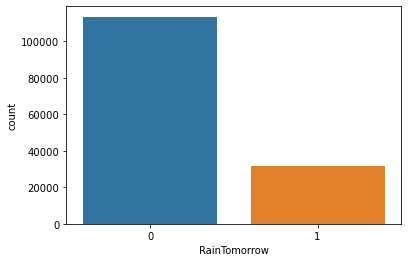

In [41]:
sns.countplot(df["RainTomorrow"])

In [42]:
#Checking the distributation
print(f'Distribution before imbalancing') 

data_count=df['RainTomorrow'].value_counts()
print(data_count)

imbalance_target=(data_count[1] /(data_count[0] + data_count[1])) * 100
print(f'Balanced Percentage : {imbalance_target} %')

imbalance_target=(data_count[0] / (data_count[0] + data_count[1])) * 100
print(f'Balanced Percentage : {imbalance_target} %')

Distribution before imbalancing
0    113583
1     31877
Name: RainTomorrow, dtype: int64
Balanced Percentage : 21.914615701911178 %
Balanced Percentage : 78.08538429808883 %


In [43]:
from collections import Counter
from matplotlib import pyplot
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

In [44]:
x = df.drop(["RainTomorrow"], axis=1)
y = df["RainTomorrow"]

class=0, n=113583 (50.000%)
class=1, n=113583 (50.000%)


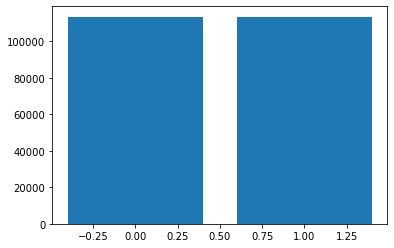

In [48]:
y = LabelEncoder().fit_transform(y)
### transform the dataset
oversample = SMOTE()
x,y = oversample.fit_resample(x,y)
### summarize distribution
counter = Counter(y)
for k , v in counter.items():
    per = v/len(y)*100
    print('class=%d, n=%d (%.3f%%)'%(k,v,per))
## plot the distribution
pyplot.bar(counter.keys(),counter.values())
pyplot.show()

In [45]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month,Date_day
0,2008-12-01,30,13.4,22.9,0.6,2.4,8.3,4.0,44.0,5.0,3.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0,0,12,1
1,2008-12-02,30,7.4,25.1,0.0,3.6,10.0,2.0,44.0,0.0,6.0,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,1.0,17.2,24.3,0,0,12,2
2,2008-12-03,30,12.9,25.7,0.0,2.6,4.4,5.0,46.0,5.0,6.0,19.0,26.0,38.0,30.0,1007.6,1008.7,8.0,2.0,21.0,23.2,0,0,12,3
3,2008-12-04,30,9.2,28.0,0.0,18.4,8.9,11.0,24.0,13.0,14.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,5.0,18.1,26.5,0,0,12,4
4,2008-12-05,30,17.5,32.3,1.0,5.4,3.0,4.0,41.0,12.0,0.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,12,5


### Plotting Q-Q Plot

In [46]:
import scipy.stats as stats
import pylab

In [47]:
def plot_curve(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[feature],dist='norm',plot=pylab)
    plt.title(feature)
    plt.show()

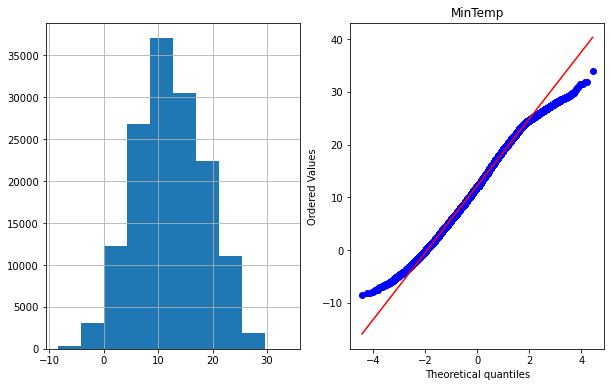

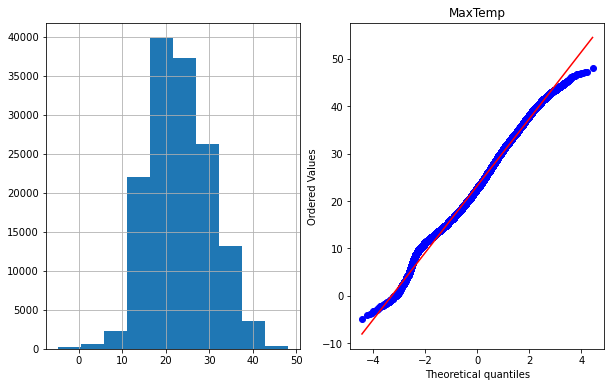

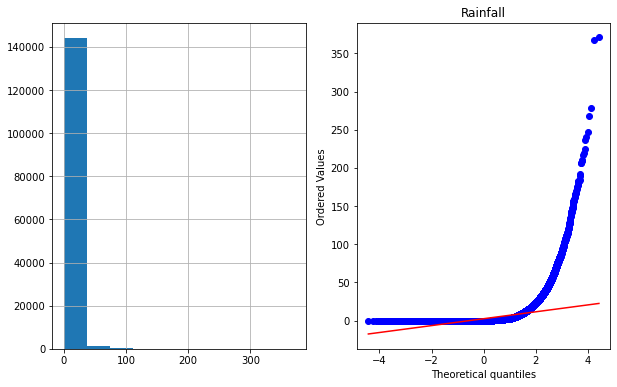

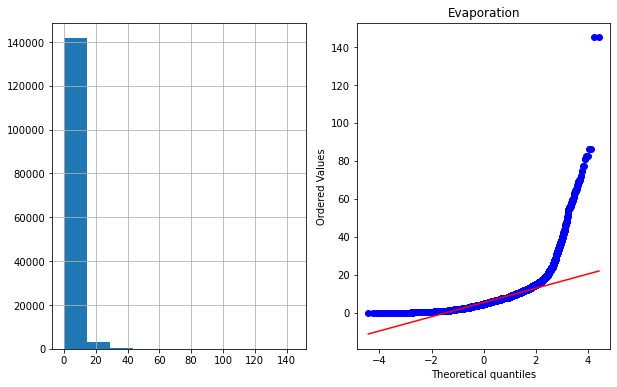

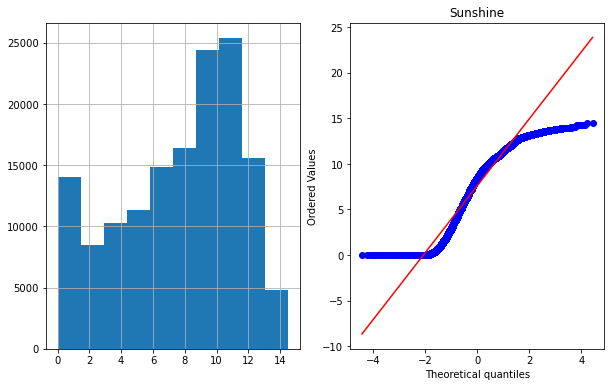

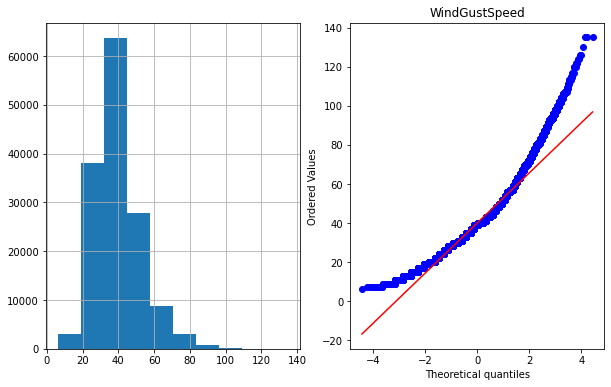

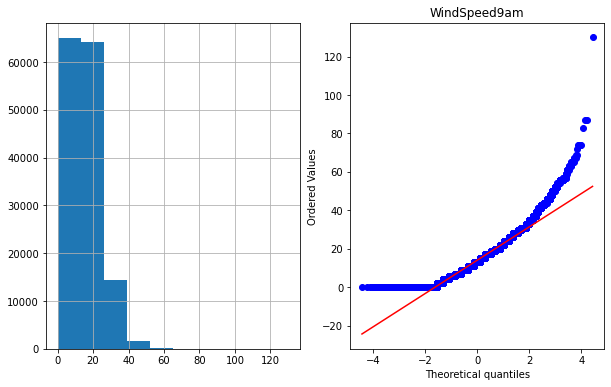

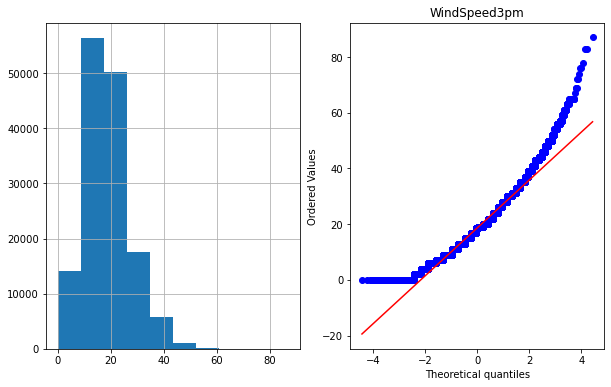

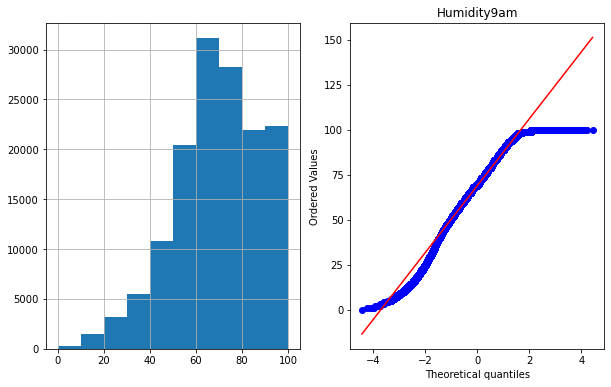

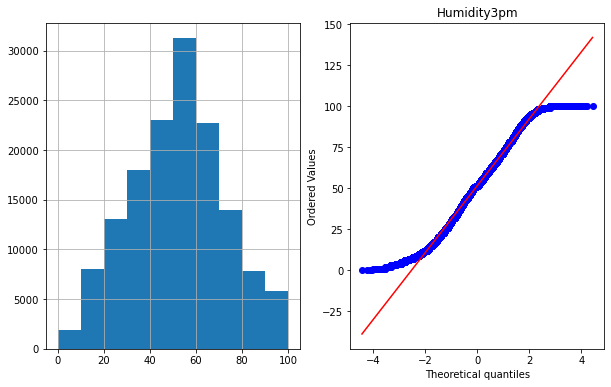

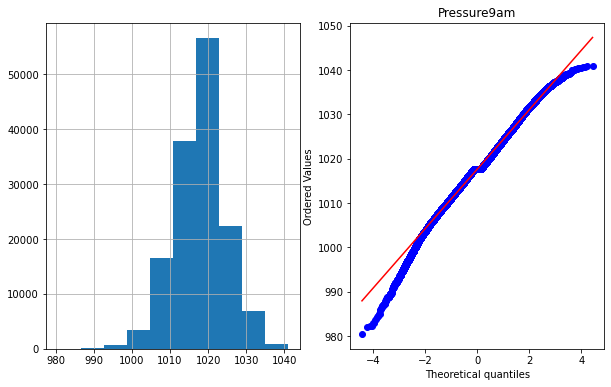

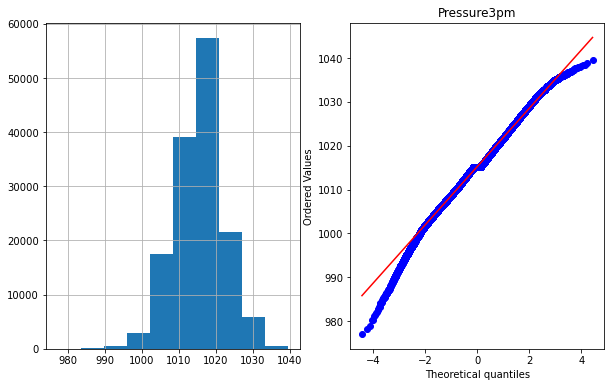

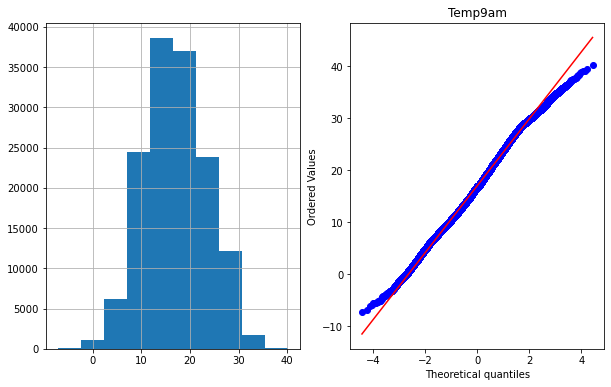

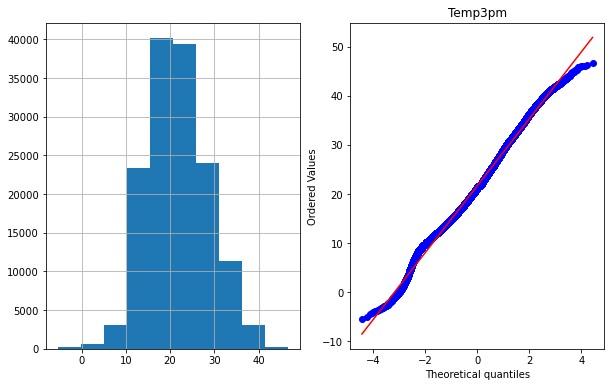

In [48]:
for i in cont_var:
    plot_curve(df, i)

### Splitting the data

In [50]:
x = df.drop(["RainTomorrow"], axis=1)
y = df["RainTomorrow"]

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
scale=StandardScaler()

In [ ]:
scale.fit(x)

In [59]:
X= scale.transform(x)

In [60]:
x.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'Date_month', 'Date_day'],
      dtype='object')

In [61]:
X=pd.DataFrame(X,columns=x.columns)

In [62]:
X.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Date_month,Date_day
0,0.415017,0.189447,-0.045336,-0.210072,-0.727927,0.182347,-0.740424,0.302234,-0.406066,-1.024910,0.672222,0.612323,0.112395,-1.442965,-1.478788,-1.223882,1.230562,-1.657694,-0.014053,0.017023,-0.529795,1.634076,-1.672844
1,0.415017,-0.753101,0.265043,-0.281650,-0.442930,0.631373,-1.187566,0.302234,-1.439618,-0.357114,-1.133438,0.382874,-1.319609,-1.296417,-1.047782,-1.118839,0.884261,-1.289981,0.032464,0.381985,-0.529795,1.634076,-1.559140
2,0.415017,0.110901,0.349692,-0.281650,-0.680427,-0.847773,-0.516853,0.454694,-0.406066,-0.357114,0.559368,0.841771,-1.637832,-1.052171,-1.493650,-0.983784,1.230562,-0.922267,0.621685,0.221402,-0.529795,1.634076,-1.445436
3,0.415017,-0.470337,0.674180,-0.281650,3.072032,0.340827,0.824574,-1.222364,1.247616,1.423675,-0.343462,-1.108541,-1.266572,-1.736061,-0.007422,-0.368534,-1.539848,0.180874,0.172017,0.703151,-0.529795,1.634076,-1.331732
4,0.415017,0.833521,1.280830,-0.162353,-0.015435,-1.217559,-0.740424,0.073544,1.040905,-1.692706,-0.794877,0.153426,0.695804,-0.905623,-1.018057,-1.388949,0.884261,1.284015,0.125499,1.170302,-0.529795,1.634076,-1.218028


In [63]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: RainTomorrow, dtype: uint8

In [110]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size =0.2, random_state = 0)

# Model Building using ML Models.
### We will use the following Algorithms:
- RandomForestClassifier
- GaussianNB
- KNeighborsClassifier
- XGB Classifier
- LDA
- Logistics Regression



## Random Forest Classifier

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
ranfor= RandomForestClassifier()

In [67]:
ranfor.fit(X_train,y_train)

RandomForestClassifier()

In [68]:
ypred= ranfor.predict(X_test)

In [69]:
print(confusion_matrix(y_test,ypred))
print(accuracy_score(y_test,ypred))
print(classification_report(y_test,ypred))

[[21754   972]
 [ 3318  3048]]
0.8525367798707548
              precision    recall  f1-score   support

           0       0.87      0.96      0.91     22726
           1       0.76      0.48      0.59      6366

    accuracy                           0.85     29092
   macro avg       0.81      0.72      0.75     29092
weighted avg       0.84      0.85      0.84     29092



C:\Users\PRATYAY\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7180115979049021

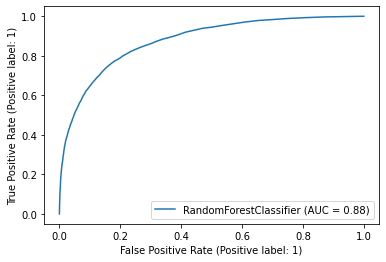

In [70]:
metrics.plot_roc_curve(ranfor, X_test, y_test)
metrics.roc_auc_score(y_test, ypred, average=None) 

## Gaussian NB

In [71]:
from sklearn.naive_bayes import GaussianNB

In [72]:
gnb= GaussianNB()

In [73]:
gnb.fit(X_train,y_train)

GaussianNB()

In [74]:
ypred2= gnb.predict(X_test)

In [75]:
print(confusion_matrix(y_test,ypred2))
print(accuracy_score(y_test,ypred2))
print(classification_report(y_test,ypred2))

[[19841  2885]
 [ 2720  3646]]
0.8073353499243778
              precision    recall  f1-score   support

           0       0.88      0.87      0.88     22726
           1       0.56      0.57      0.57      6366

    accuracy                           0.81     29092
   macro avg       0.72      0.72      0.72     29092
weighted avg       0.81      0.81      0.81     29092



C:\Users\PRATYAY\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7228915098855967

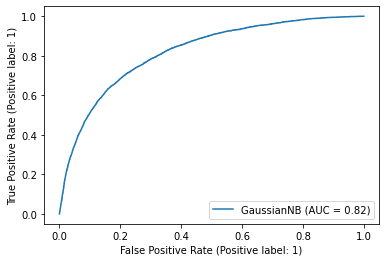

In [76]:
metrics.plot_roc_curve(gnb, X_test, y_test)
metrics.roc_auc_score(y_test, ypred2, average=None) 

## K Nearest Neighbors

In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
knn = KNeighborsClassifier(n_neighbors=3)

In [79]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [80]:
ypred3= knn.predict(X_test)

In [81]:
print(confusion_matrix(y_test,ypred3))
print(accuracy_score(y_test,ypred3))
print(classification_report(y_test,ypred3))

[[20945  1781]
 [ 3214  3152]]
0.8283033136257391
              precision    recall  f1-score   support

           0       0.87      0.92      0.89     22726
           1       0.64      0.50      0.56      6366

    accuracy                           0.83     29092
   macro avg       0.75      0.71      0.73     29092
weighted avg       0.82      0.83      0.82     29092



C:\Users\PRATYAY\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7083809957573772

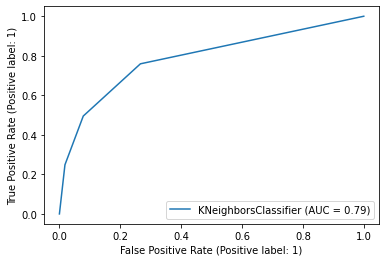

In [82]:
metrics.plot_roc_curve(knn, X_test, y_test)
metrics.roc_auc_score(y_test, ypred3, average=None) 

## XGB Classifier

In [83]:
from xgboost import XGBClassifier

In [84]:
xgb= XGBClassifier()

In [85]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [86]:
ypred4= xgb.predict(X_test)

In [87]:
print(confusion_matrix(y_test,ypred4))
print(accuracy_score(y_test,ypred4))
print(classification_report(y_test,ypred4))

[[21543  1183]
 [ 2896  3470]]
0.8597896328887666
              precision    recall  f1-score   support

           0       0.88      0.95      0.91     22726
           1       0.75      0.55      0.63      6366

    accuracy                           0.86     29092
   macro avg       0.81      0.75      0.77     29092
weighted avg       0.85      0.86      0.85     29092



C:\Users\PRATYAY\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7465141698579167

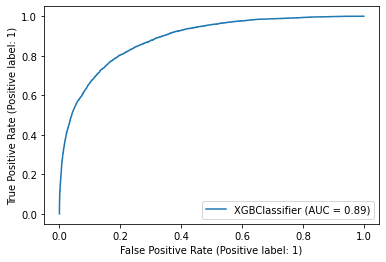

In [88]:
metrics.plot_roc_curve(xgb, X_test, y_test)
metrics.roc_auc_score(y_test, ypred4, average=None) 

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict

## Logistics regression


In [105]:
cv = StratifiedKFold(n_splits=10, shuffle=False)

In [95]:
model = LogisticRegression()

In [112]:
lr_base = LogisticRegression()

lr_base.fit(X_train, y_train)

y_pred_lr_base = lr_base.predict(X_test)
print(classification_report(y_test, y_pred_lr_base))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     22726
           1       0.71      0.45      0.55      6366

    accuracy                           0.84     29092
   macro avg       0.78      0.70      0.72     29092
weighted avg       0.83      0.84      0.82     29092



C:\Users\PRATYAY\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  if solver != 'liblinear' and dual:


In [113]:
test_accuracy_lr_base = accuracy_score(y_test,y_pred_lr_base)*100
print("Logistic Regression accuracy for testing dataset is : {:.2f}%".format(test_accuracy_lr_base))

Logistic Regression accuracy for testing dataset is : 83.86%


In [114]:
lr_base.get_params

<bound method BaseEstimator.get_params of LogisticRegression()>

In [115]:
grid_params={"C":np.logspace(0, 4, 10), "penalty":["l1","l2"]}
cross_val = StratifiedKFold(n_splits=10)

lr_grid = LogisticRegression()

logreg_cv = GridSearchCV(lr_grid, grid_params, cv=cross_val)

logreg_cv.fit(X_train,y_train)

print("Logistic Regression tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("Logistic Regression accuracy :",logreg_cv.best_score_)

C:\Users\PRATYAY\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  if solver != 'liblinear' and dual:
C:\Users\PRATYAY\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  if 

Logistic Regression tuned hpyerparameters :(best parameters)  {'C': 1291.5496650148827, 'penalty': 'l2'}
Logistic Regression accuracy : 0.8402911229880935


C:\Users\PRATYAY\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  if solver != 'liblinear' and dual:


In [116]:
lr_best = LogisticRegression(C=1, penalty='l2')
lr_best.fit(X_train, y_train)

y_pred_lr_best = lr_base.predict(X_test)
print(classification_report(y_test, y_pred_lr_best))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     22726
           1       0.71      0.45      0.55      6366

    accuracy                           0.84     29092
   macro avg       0.78      0.70      0.72     29092
weighted avg       0.83      0.84      0.82     29092



C:\Users\PRATYAY\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  if solver != 'liblinear' and dual:


In [117]:
test_accuracy_lr_best = accuracy_score(y_test,y_pred_lr_best)*100
print("Logistic Regression accuracy for testing dataset with tunned parameter is : {:.2f}%".format(test_accuracy_lr_best))

Logistic Regression accuracy for testing dataset with tunned parameter is : 83.86%


# LDA

In [119]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [120]:
# define model
lda_model = LinearDiscriminantAnalysis()

# fit model
lda_model.fit(X_train, y_train)

# make a prediction
y_pred_lda = lda_model.predict(X_test)

In [121]:
# evaluate predictions
text_accuracy_lda = accuracy_score(y_test, y_pred_lda)
print("LDA Accuracy: %.2f%%" % (text_accuracy_lda * 100.0))

LDA Accuracy: 84.21%


In [122]:
from numpy import arange
lda_model_grid = LinearDiscriminantAnalysis()
# define model evaluation method
cross_val = StratifiedKFold(n_splits=10)

# define grid
lda_grid = dict()
lda_grid['solver'] = ['svd', 'lsqr', 'eigen']
lda_grid['shrinkage'] = arange(0, 1, 0.01)

# define search
lda_search = GridSearchCV(lda_model_grid, lda_grid, scoring='accuracy', cv=cross_val, n_jobs=-1)

# perform the search
results = lda_search.fit(X_train, y_train)

# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

exception calling callback for <Future at 0x21509780040 state=finished raised BrokenProcessPool>
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\PRATYAY\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py", line 404, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "C:\Users\PRATYAY\Anaconda3\lib\multiprocessing\queues.py", line 116, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute '_FuncWrapper' on <module 'sklearn.utils.fixes' from 'C:\\Users\\PRATYAY\\Anaconda3\\lib\\site-packages\\sklearn\\utils\\fixes.py'>
"""

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\PRATYAY\Anaconda3\lib\site-packages\joblib\externals\loky\_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "C:\Users\PRATYAY\Anaconda3\lib\site-packages\joblib\parallel.py", line 359, 

BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

In [123]:
# define model
lda_model_best = LinearDiscriminantAnalysis(shrinkage = 0.12, solver = 'lsqr')

# fit model
lda_model_best.fit(X_train, y_train)

# make a prediction
y_pred_lda_best = lda_model_best.predict(X_test)

In [124]:
# evaluate predictions
test_accuracy_lda_best = accuracy_score(y_test, y_pred_lda_best)
print("LDA Accuracy after tunning: %.2f%%" % (test_accuracy_lda_best * 100.0))

LDA Accuracy after tunning: 83.95%


### We will save the best performing model i.e. XGB Classsifier model in our pickle file

In [ ]:
import pickle

In [ ]:
file = open('rain_XGBnew_model.pkl', 'wb')

In [ ]:
pickle.dump(xgb, file)

In [ ]:
model = pickle.load(open("rain_XGBnew_model.pkl", "rb"))

# Using Auto ML

##**PyCaret Library**

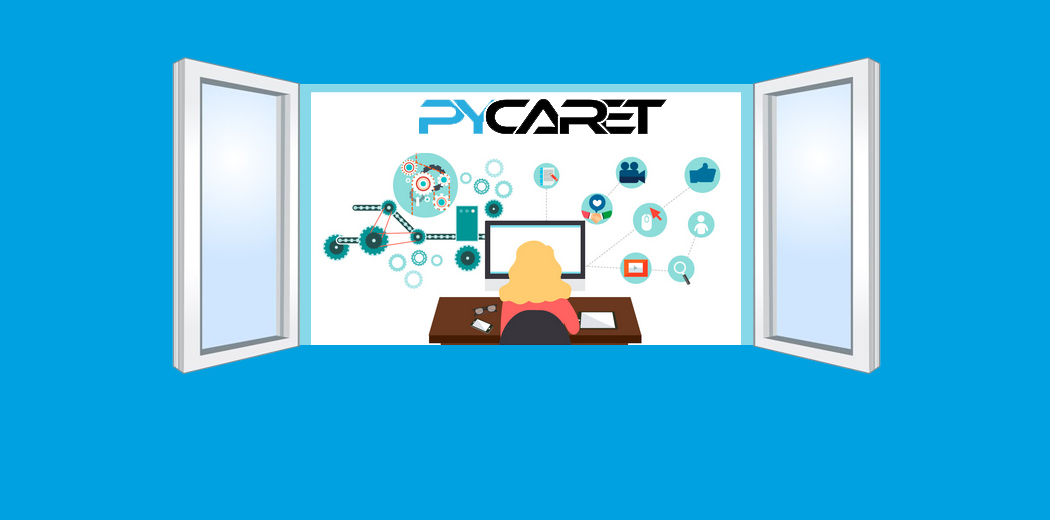

### PyCaret is an open source, low-code machine learning library in Python that allows you to go from preparing your data to deploying your model within minutes in your choice of notebook environment.

### Installing PyCaret

In [90]:
pip install pycaret


  Using cached pycaret-2.3.10-py3-none-any.whl (320 kB)
  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)
  Using cached gensim-3.8.3-cp38-cp38-win_amd64.whl (24.2 MB)
  Using cached Boruta-0.3-py3-none-any.whl (56 kB)
  Using cached lightgbm-3.3.2-py3-none-win_amd64.whl (1.0 MB)
  Using cached mlflow-1.28.0-py3-none-any.whl (17.0 MB)
  Using cached kmodes-0.12.1-py2.py3-none-any.whl (20 kB)
  Using cached umap_learn-0.5.3-py3-none-any.whl
  Using cached pyod-1.0.4-py3-none-any.whl
  Using cached spacy-2.3.7-cp38-cp38-win_amd64.whl (9.7 MB)
  Using cached cufflinks-0.17.3-py3-none-any.whl
  Using cached imbalanced_learn-0.7.0-py3-none-any.whl (167 kB)
  Using cached mlxtend-0.20.0-py2.py3-none-any.whl (1.3 MB)
  Using cached mlxtend-0.19.0-py2.py3-none-any.whl (1.3 MB)
  Using cached yellowbrick-1.3.post1-py3-none-any.whl (271 kB)
  Using cached GitPython-3.1.27-py3-none-any.whl (181 kB)
  Using cached prometheus_flask_exporter-0.20.3-py3-none-any.whl (18 kB)
  Using cached py

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.2.0 requires spacy<3.3.0,>=3.2.0, but you have spacy 2.3.7 which is incompatible.
en-core-web-md 3.2.0 requires spacy<3.3.0,>=3.2.0, but you have spacy 2.3.7 which is incompatible.
You should consider upgrading via the 'C:\Users\PRATYAY\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [ ]:
from pycaret.classification import *

In [ ]:
model= setup(data= df, target= 'RainTomorrow')

In [ ]:
compare_models()

In [ ]:
lightgbm= create_model('lightgbm')

In [ ]:
pred_holdout = predict_model(lightgbm,data= X_test)

In [ ]:
pred_holdout